# Analysis of Stroke Dataset

##### Author: Chenyang Skylar Li

This Jupyter notebook contains an analysis of the stroke dataset, which includes information on patient demographics, medical history, and lifestyle factors, as well as whether or not each patient had a stroke. The goal of this analysis is to develop a predictive model that can accurately identify patients who are at high risk of stroke, so that appropriate preventative measures can be taken to reduce their risk.


## Background

The stroke dataset is a collection of medical records for patients. The dataset includes information on patient demographics, medical history, and lifestyle factors, as well as whether or not each patient had a stroke.

Stroke is a serious medical condition that occurs when the blood supply to part of the brain is interrupted or reduced, leading to brain damage and potential long-term disability or death. The risk of stroke is affected by a wide range of factors, including age, gender, hypertension, heart disease, obesity, and smoking.

The goal of this dataset is to develop a predictive model that can accurately identify patients who are at high risk of stroke, so that appropriate preventative measures can be taken to reduce their risk.


## Exploratory Data Analysis

In this exploratory data analysis (EDA) of the healthcare-dataset-stroke-data.csv dataset, we performed the following steps:

1. Loaded the dataset into a Pandas dataframe
2. Checked the dataset's shape, columns, and first few rows
3. Checked the data types of the columns
4. Checked the distribution of the target variable (stroke) using a count plot
5. Checked the distribution of the numerical variables (age, bmi, avg_glucose_level ) using a histogram plot
6. Checked the distribution of the categorical variables using count plots
7. Checked the relationship between the features and the target variable using box plots and count plots
8. Checked the correlation between the features using a heatmap plot

This EDA helped us gain a better understanding of the dataset and identify potential issues with missing values, class imbalance, and feature correlation. We also gained insights into which features may be useful for predicting stroke risk, which can guide our decisions for data preprocessing, feature selection, and model training in future steps of the analysis.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [418]:
# Load the dataset into a Pandas dataframe
stroke_data = pd.read_csv("healthcare-dataset-stroke-data.csv")
# Check the dataset's shape, columns, and first few rows
stroke_data 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [419]:
# Check the data types of the columns
print(stroke_data.dtypes)

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


<AxesSubplot:xlabel='stroke', ylabel='count'>

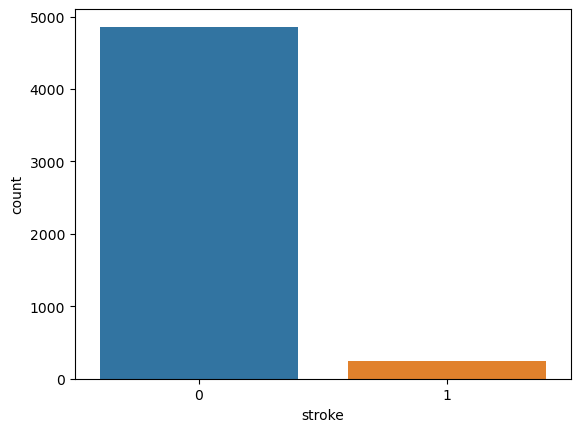

In [420]:
# Check the distribution of the target variable
sns.countplot(x="stroke", data=stroke_data)

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

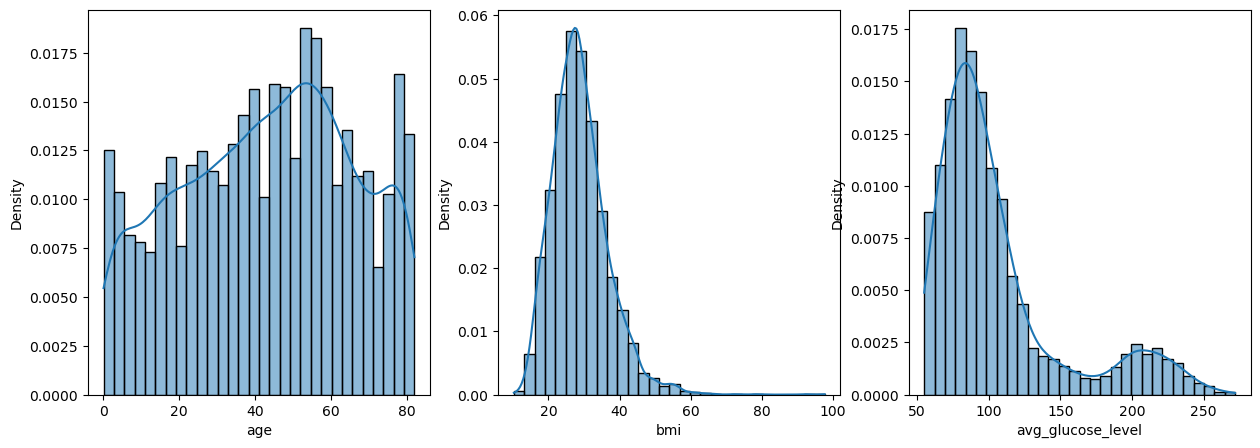

In [421]:
# Check the distribution of the numerical variables
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=False)
sns.histplot(x="age", data=stroke_data, bins=30, ax=axes[0], kde = True, stat = "density", linewidth=1)
sns.histplot(x="bmi", data=stroke_data, bins=30, ax=axes[1], kde = True, stat = "density", linewidth=1)
sns.histplot(x="avg_glucose_level", data=stroke_data, bins=30, ax=axes[2], kde = True, stat = "density", linewidth=1)

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

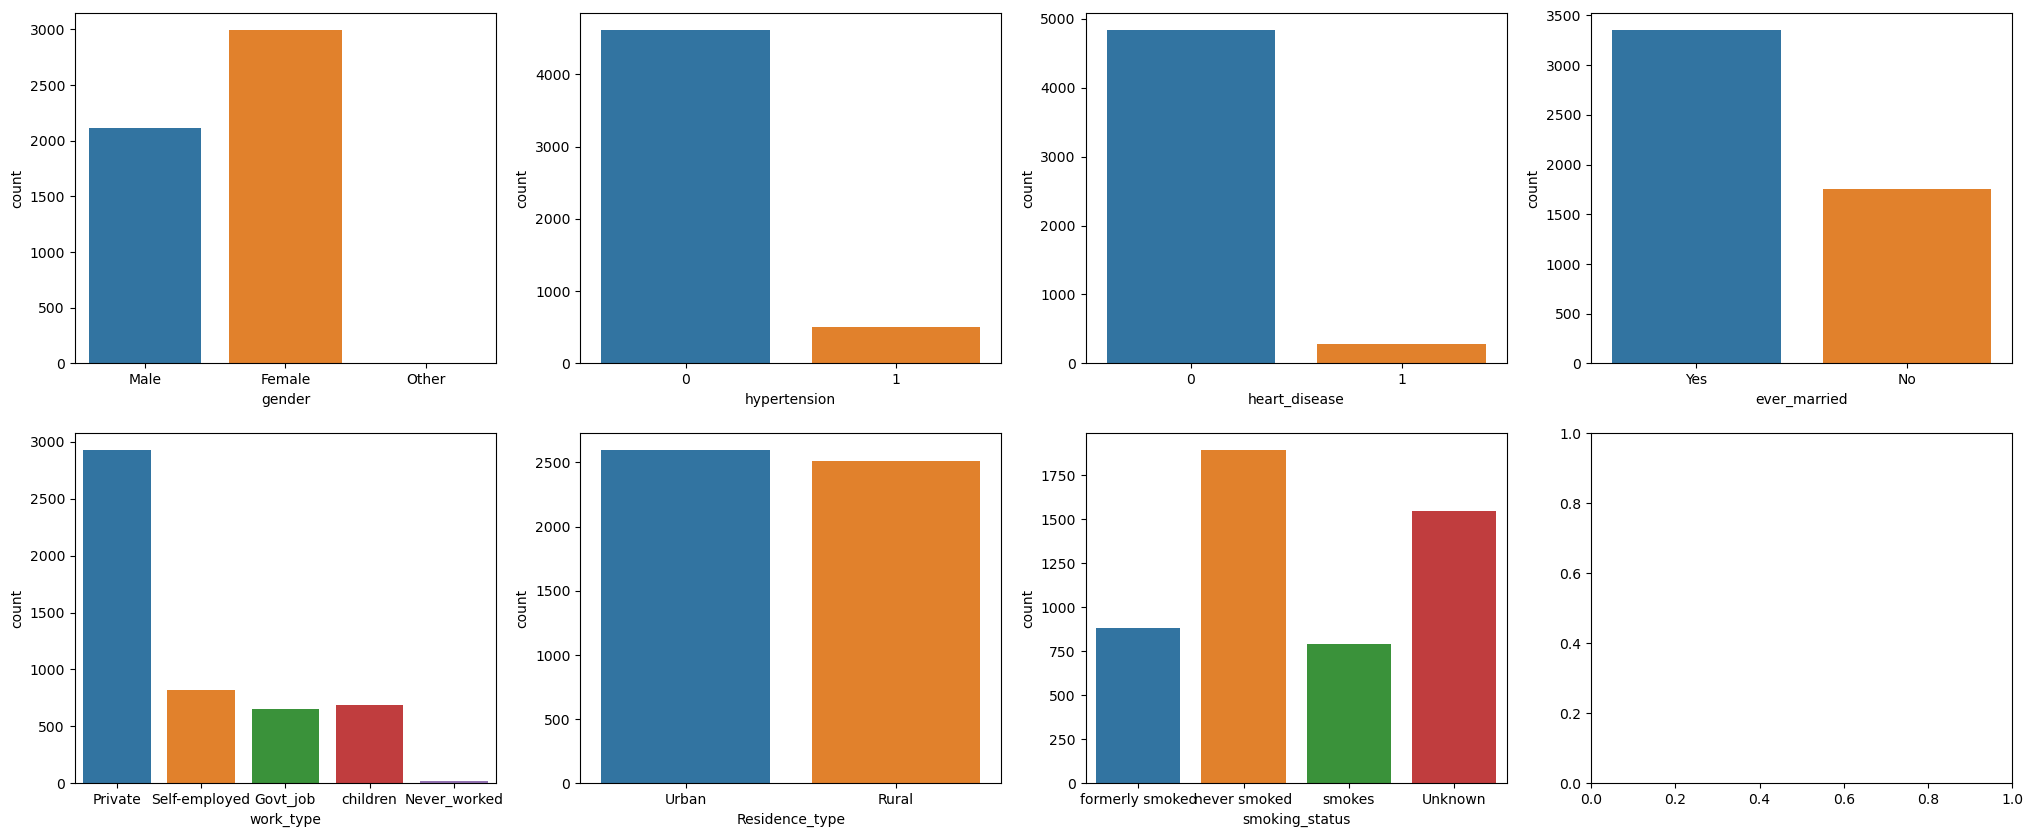

In [422]:
# Check the distribution of the categorical variables
fig, axes = plt.subplots(2, 4, figsize=(25, 10), sharey=False)
sns.countplot(x="gender", data=stroke_data, ax=axes[0,0])
sns.countplot(x="hypertension", data=stroke_data, ax=axes[0,1])
sns.countplot(x="heart_disease", data=stroke_data, ax=axes[0,2])
sns.countplot(x="ever_married", data=stroke_data, ax=axes[0,3])
sns.countplot(x="work_type", data=stroke_data, ax=axes[1,0])
sns.countplot(x="Residence_type", data=stroke_data, ax=axes[1,1])
sns.countplot(x="smoking_status", data=stroke_data, ax=axes[1,2])

<AxesSubplot:xlabel='stroke', ylabel='count'>

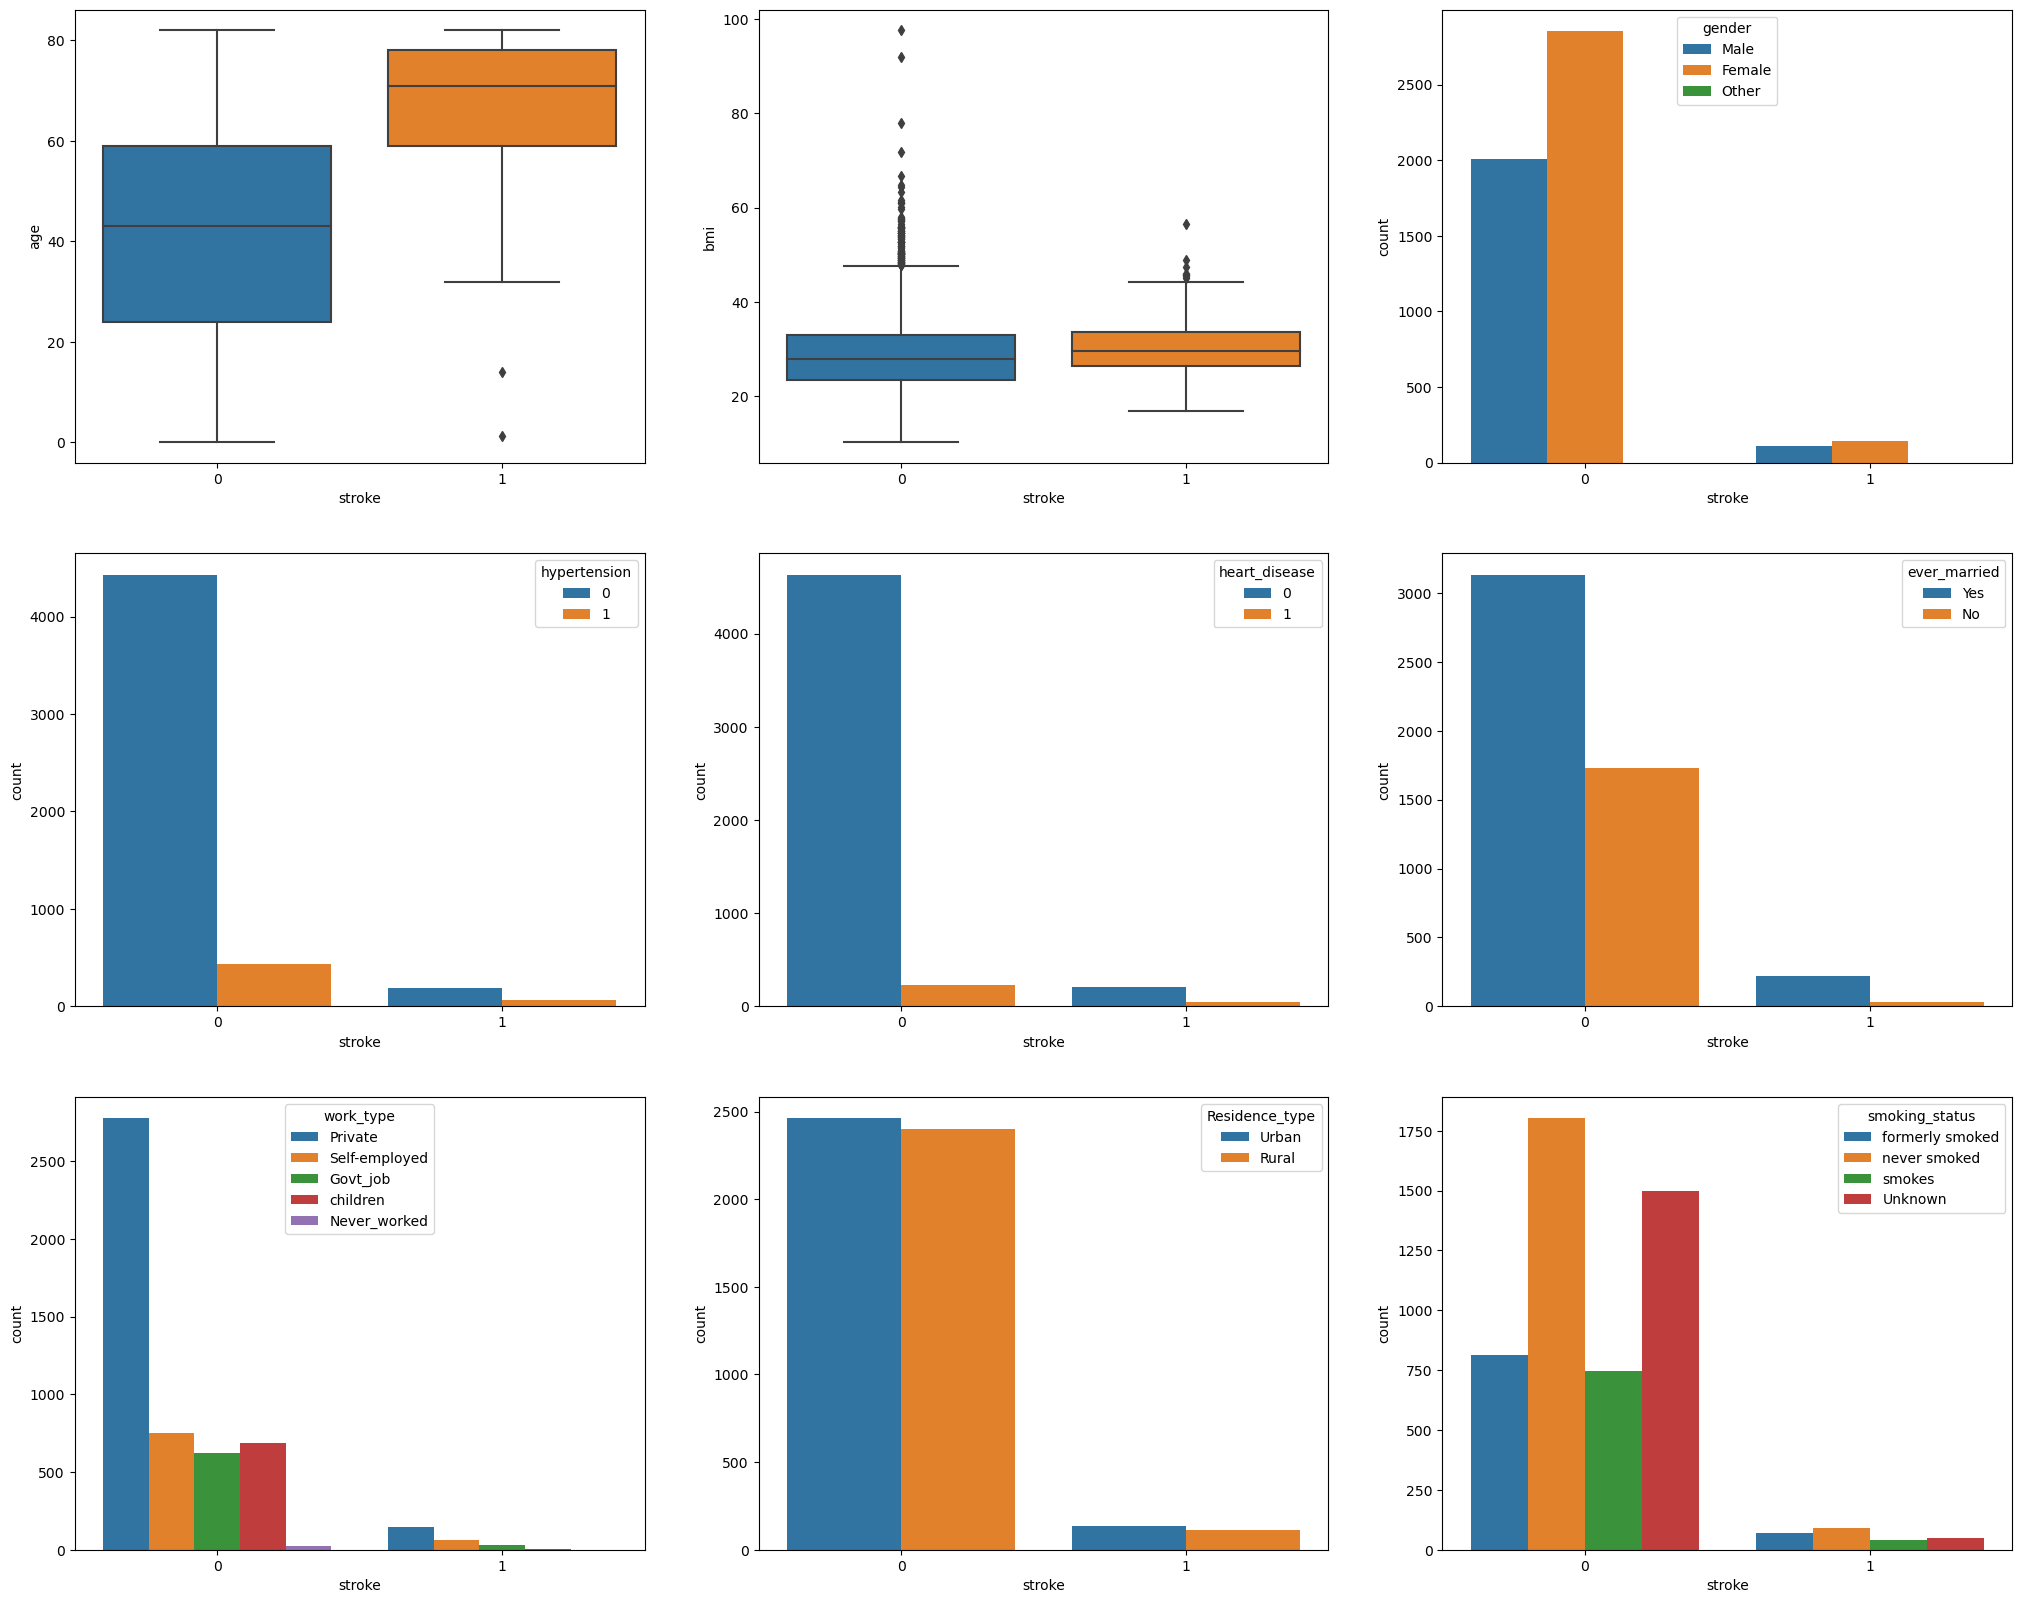

In [423]:
# Check the relationship between the features and the target variable
fig, axes = plt.subplots(3, 3, figsize=(25, 20), sharey=False)
sns.boxplot(x="stroke", y="age", data=stroke_data, ax=axes[0,0])
sns.boxplot(x="stroke", y="bmi", data=stroke_data, ax=axes[0,1])
sns.countplot(x="stroke", hue="gender", data=stroke_data, ax=axes[0,2])
sns.countplot(x="stroke", hue="hypertension", data=stroke_data, ax=axes[1,0])
sns.countplot(x="stroke", hue="heart_disease", data=stroke_data, ax=axes[1,1])
sns.countplot(x="stroke", hue="ever_married", data=stroke_data, ax=axes[1,2])
sns.countplot(x="stroke", hue="work_type", data=stroke_data, ax=axes[2,0])
sns.countplot(x="stroke", hue="Residence_type", data=stroke_data, ax=axes[2,1])
sns.countplot(x="stroke", hue="smoking_status", data=stroke_data, ax=axes[2,2])

<AxesSubplot:>

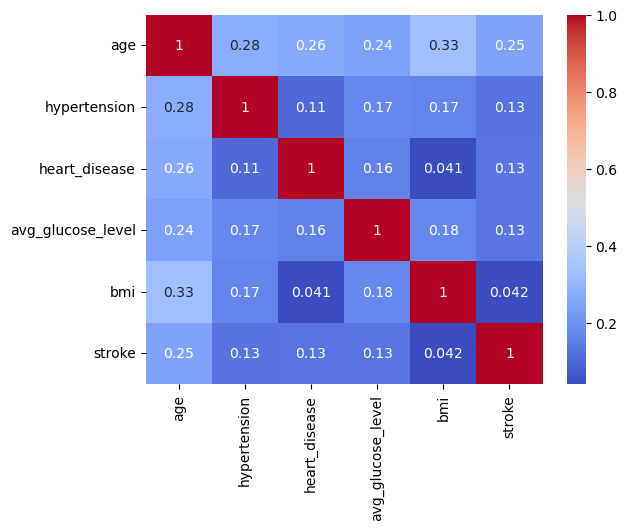

In [424]:
# Check the correlation between the features
sns.heatmap(stroke_data.iloc[:, 1:].corr(), annot=True, cmap="coolwarm")

In [425]:
# Check for missing values
print(stroke_data.isnull().sum())

# Check the stroke status where the bmi is missing
print("#stroke when bmi missing:\n ",stroke_data[stroke_data['bmi'].isnull()]['stroke'].value_counts())

# select smoker status equals to Unknown and calculate the number of rows
print("#smoking unknown:\n ", stroke_data[stroke_data['smoking_status'] == 'Unknown'].shape[0])

# Check the stroke status where smoker status equals to Unknown 
print("#stroke when smoking unknown:\n ",stroke_data[stroke_data['smoking_status'] == 'Unknown']['stroke'].value_counts())



id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64
#stroke when bmi missing:
  0    161
1     40
Name: stroke, dtype: int64
#smoking unknown:
  1544
#stroke when smoking unknown:
  0    1497
1      47
Name: stroke, dtype: int64


### Summary of features in the stroke dataset:

- `id`: Unique identifier for each row
- `gender`: "Male", "Female" or "Other".  
- `age`: Age of the patient.    **May Normally distributed**
- `hypertension`: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension.  **Imbalanced**
- `heart_disease`: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease.  **Imbalanced**
- `ever_married`: "No" or "Yes".  **Imbalanced**
- `work_type`: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed".  **Imbalanced**
- `Residence_type`: "Rural" or "Urban".   
- `avg_glucose_level`: Average glucose level in blood.**Bimodal distribution**
- `bmi`: Body mass index.    **Has missing values. May need to impute the missing values or drop the rows with missing values. Skewed normal distribution**
- `smoking_status`: "formerly smoked", "never smoked", "smokes" or "Unknown".   **Has missing values. "Unknown" in smoking_status means that the information is unavailable or missing. Imbalanced**
- `stroke`: 1 if the patient had a stroke or 0 if not.  **Imbalanced**


Other: The dataset has a mix of numerical and categorical features. We may need to encode the categorical features to numerical values to use them in machine learning models.

Correlation: There is a positive correlation between age and hypertension and heart disease, which may be useful in predicting stroke risk. We may need to perform feature selection to identify the most important features for predicting stroke risk.

The relationship between the features and the target variable: Stroke is more common in older individuals, those with higher BMI, those with hypertension or heart disease, and those who have ever been married. Additionally, there were some differences in stroke rates based on gender, work type, residence type, and smoking status.


## Data Preprocess

1. `Handling missing values`: We observed that the BMI column has some missing values. There are different strategies to handle missing values, including imputation or deletion. **In this case, we could impute the missing values using mean BMI value** since it is normally distributed. We did not choose deletion because dropping data is not always the best strategy since it may lead to a loss of information, especially if the missing values are a small fraction of the dataset. In the case of the stroke dataset, dropping the missing BMI values would mean losing around 4% of the data. Since this is a relatively small fraction of the data, it may be better to impute the missing values instead of dropping them. In addition, the stroke target is imbalanced, dropping the missing value will lose many postive values. **For categorical feature "smoking_status", we keeped the missing values "Unknown"** to preserve the missing values as a separate category which did not not bias the analysis towards any specific value.

2. `Handling imbalanced target variable`: Since the target variable (stroke) is imbalanced, we need to address this issue by either oversampling the minority class (positive stroke diagnosis) or undersampling the majority class (negative stroke diagnosis). There are different methods to achieve this, such as random oversampling, SMOTE (Synthetic Minority Over-sampling Technique), or random undersampling. **In this example, we used the random oversampling method from the imbalanced-learn library to oversample the minority class.** This method generates synthetic samples for the minority class using interpolation techniques, which can help balance the class distribution.

3. `Encoding categorical variables`: Many machine learning algorithms cannot handle categorical variables directly, so we need to encode them as numerical values. **In this case, we used label encoding** to assign a unique integer value to each category. 

4. `Feature scaling`: **In this case, we scaled numeric features to have a mean of 0 and a standard deviation of 1.** StandardScaler is a popular choice for feature scaling because it preserves the shape of the original distribution while centering the data and making it more interpretable for machine learning algorithms.

5. `Feature selection`: We observed that some features have a stronger correlation with the target variable than others. Feature selection involves selecting a subset of the most important features that are most predictive of the target variable. This can improve model performance and reduce overfitting. **In this case, We chose the Univariate feature selection method using the f_classif score function.** This method is suitable for our data, which has a mix of categorical and numerical features, and it can capture the statistical significance of each feature in relation to the target variable. Additionally, it is computationally efficient and can be easily integrated into a machine learning pipeline. 


**Note**:
1. The preprecessed data by step 1-4 was stored as `stroke_data_preprocessed`. The preprocessed data after feature selection (step 5) was stored as `stroke_data_preprocessed_selected`

2. The rationale to perform step 2 before step 4: 
It is generally recommended to handle the imbalance in the target variable first before performing feature scaling. This is because scaling can change the distribution and variance of the data, which can negatively affect the performance of imbalanced learning algorithms. When we have an imbalanced target variable, it means that we have a much larger number of samples for one class than the other. This can cause issues such as poor classification performance for the minority class, overfitting to the majority class, and biased model predictions. To address this issue, we can use techniques such as oversampling or undersampling to balance the number of samples in each class. Once we have balanced the target variable, we can then scale the features to a similar range using techniques such as normalization or standardization. Scaling can improve the performance of certain machine learning algorithms, such as KNN and SVM, by reducing the effect of variables with larger ranges and variances. Therefore, it is recommended to handle imbalance first and then scale the features to ensure that we have a balanced dataset that is ready for modeling.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

In [427]:
# Re-Load the dataset into a Pandas dataframe
stroke_data = pd.read_csv("healthcare-dataset-stroke-data.csv")
# Make a copy of the original dataframe
stroke_data_preprocessed = stroke_data.copy()
# Drop the id column
stroke_data_preprocessed.drop('id', axis=1, inplace=True)
stroke_data_preprocessed

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Text(0.5, 1.0, 'After Imputation')

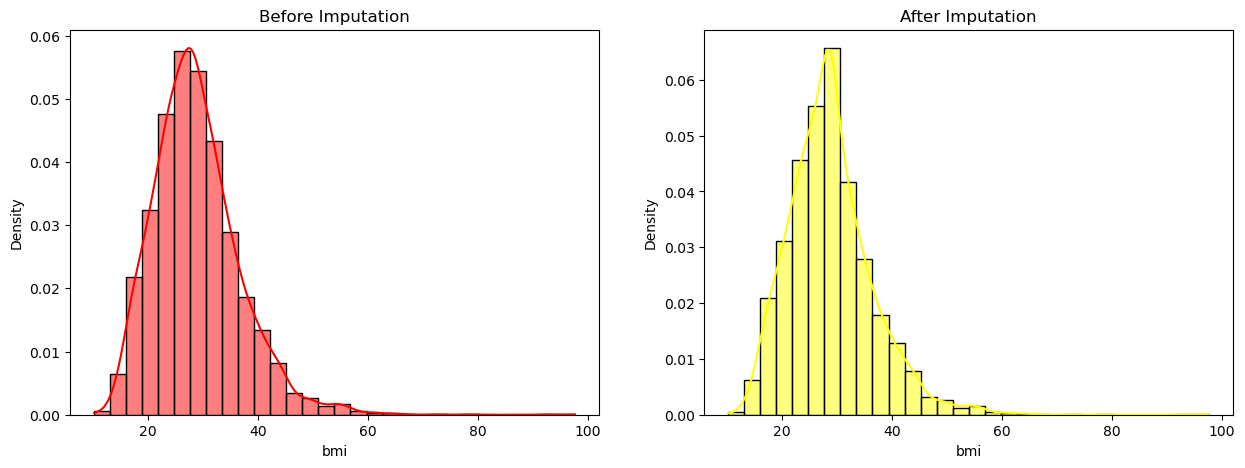

In [428]:
# Handle missing values in the BMI column
imputer = SimpleImputer(strategy="mean")
stroke_data_preprocessed["bmi"] = imputer.fit_transform(stroke_data_preprocessed[["bmi"]])
# Check the distribution of the BMI column after imputation
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
sns.histplot(x="bmi", data=stroke_data, bins=30, ax=axes[0], kde = True, stat = "density", linewidth=1, color="red").set_title("Before Imputation")
sns.histplot(x="bmi", data=stroke_data_preprocessed, bins=30, ax=axes[1], kde = True, stat = "density", linewidth=1, color="yellow").set_title("After Imputation")

In [429]:
# Handle imbalanced target variable using random oversampling
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(stroke_data_preprocessed.drop("stroke", axis=1), stroke_data_preprocessed["stroke"])
stroke_data_preprocessed = pd.concat([X_resampled, y_resampled], axis=1)
print("#stroke before random oversampling:\n ",stroke_data['stroke'].value_counts())
print("#stroke before random oversampling:\n ",stroke_data_preprocessed['stroke'].value_counts())
stroke_data_preprocessed

#stroke before random oversampling:
  0    4861
1     249
Name: stroke, dtype: int64
#stroke before random oversampling:
  1    4861
0    4861
Name: stroke, dtype: int64


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
9717,Male,59.0,0,0,Yes,Private,Urban,86.23,30.000000,formerly smoked,1
9718,Female,38.0,0,0,No,Self-employed,Urban,82.28,24.000000,formerly smoked,1
9719,Female,66.0,0,0,Yes,Self-employed,Urban,101.45,28.893237,Unknown,1
9720,Female,65.0,0,0,Yes,Private,Urban,205.77,46.000000,formerly smoked,1


In [430]:
# Encode categorical variables using LabelEncoder
# Define a function to encode categorical variables using LabelEncoder
def label_encode(column):
    le = LabelEncoder()
    stroke_data_preprocessed[column] = le.fit_transform(stroke_data_preprocessed[column])
    print(f"Encoded values for {column}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Encode categorical variables using LabelEncoder
label_encode("gender")
label_encode("ever_married")
label_encode("work_type")
label_encode("Residence_type")
label_encode("smoking_status")

Encoded values for gender: {'Female': 0, 'Male': 1, 'Other': 2}
Encoded values for ever_married: {'No': 0, 'Yes': 1}
Encoded values for work_type: {'Govt_job': 0, 'Never_worked': 1, 'Private': 2, 'Self-employed': 3, 'children': 4}
Encoded values for Residence_type: {'Rural': 0, 'Urban': 1}
Encoded values for smoking_status: {'Unknown': 0, 'formerly smoked': 1, 'never smoked': 2, 'smokes': 3}


Text(0.5, 1.0, 'After Scaling')

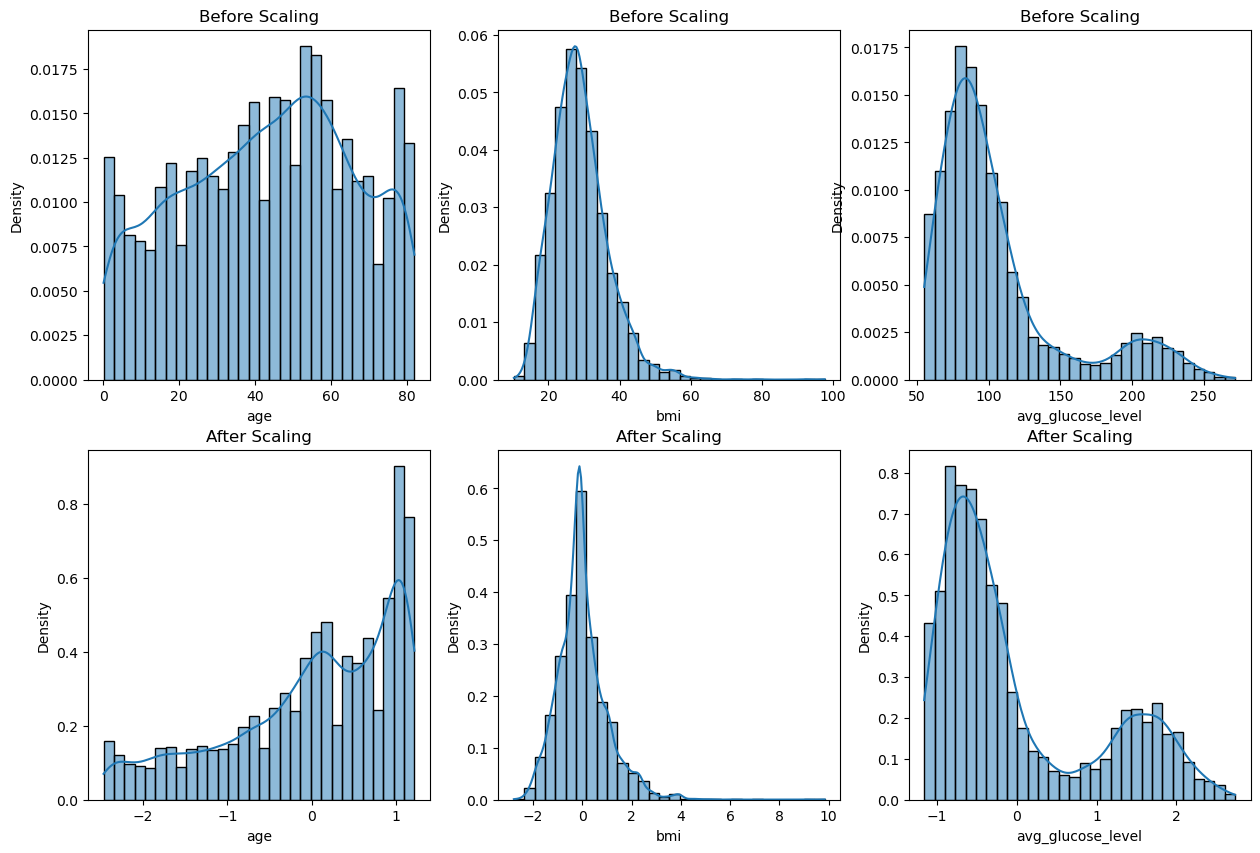

In [431]:
# Scale numerical features using StandardScaler
numerical_columns = ["age", "bmi", "avg_glucose_level"]
scaler = StandardScaler()
scaler.fit(stroke_data_preprocessed[numerical_columns])
scaled_numerical = scaler.transform(stroke_data_preprocessed[numerical_columns])
scaled_numerical = pd.DataFrame(scaled_numerical, columns=numerical_columns)
stroke_data_preprocessed = pd.concat([stroke_data_preprocessed.drop(numerical_columns, axis=1), scaled_numerical], axis=1)

# Check the distribution after scaling
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharey=False)
sns.histplot(x="age", data=stroke_data, bins=30, ax=axes[0,0], kde = True, stat = "density", linewidth=1).set_title("Before Scaling")
sns.histplot(x="bmi", data=stroke_data, bins=30, ax=axes[0,1], kde = True, stat = "density", linewidth=1).set_title("Before Scaling")
sns.histplot(x="avg_glucose_level", data=stroke_data, bins=30, ax=axes[0,2], kde = True, stat = "density", linewidth=1).set_title("Before Scaling")
sns.histplot(x="age", data=stroke_data_preprocessed, bins=30, ax=axes[1,0], kde = True, stat = "density", linewidth=1).set_title("After Scaling")
sns.histplot(x="bmi", data=stroke_data_preprocessed, bins=30, ax=axes[1,1], kde = True, stat = "density", linewidth=1).set_title("After Scaling")
sns.histplot(x="avg_glucose_level", data=stroke_data_preprocessed, bins=30, ax=axes[1,2], kde = True, stat = "density", linewidth=1).set_title("After Scaling")

In [432]:
stroke_data_preprocessed

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke,age,bmi,avg_glucose_level
0,1,0,1,1,2,1,1,1,0.541276,1.022489,1.959782
1,0,0,0,1,3,0,2,1,0.271341,-0.091219,1.483590
2,1,0,1,1,2,0,2,1,1.126135,0.429996,-0.248000
3,0,0,0,1,2,1,3,1,-0.268529,0.704566,0.926475
4,0,1,0,1,3,0,2,1,1.081146,-0.798344,0.978446
...,...,...,...,...,...,...,...,...,...,...,...
9717,1,0,0,1,2,1,1,1,0.181363,0.068720,-0.602087
9718,0,0,0,0,3,1,1,1,-0.763410,-0.798344,-0.673120
9719,0,0,0,1,3,1,0,1,0.496287,-0.091219,-0.328384
9720,0,0,0,1,2,1,1,1,0.451298,2.380888,1.547610


In [433]:
# Select the top 5 most important features using SelectKBest and f_classif
selector = SelectKBest(score_func=f_classif, k=5)
selector.fit(stroke_data_preprocessed.drop("stroke", axis=1), stroke_data_preprocessed["stroke"])
selected_columns = selector.get_support(indices=True)
selected_features = stroke_data_preprocessed.drop("stroke", axis=1).columns[selected_columns].tolist()
print("selected features: ", selected_features )
stroke_data_preprocessed_selected = stroke_data_preprocessed[selected_features + ["stroke"]]
stroke_data_preprocessed_selected

selected features:  ['hypertension', 'heart_disease', 'ever_married', 'age', 'avg_glucose_level']


,hypertension,heart_disease,ever_married,age,avg_glucose_level,stroke
0,0,1,1,0.541276,1.959782,1
1,0,0,1,0.271341,1.483590,1
2,0,1,1,1.126135,-0.248000,1
3,0,0,1,-0.268529,0.926475,1
4,1,0,1,1.081146,0.978446,1
...,...,...,...,...,...,...
9717,0,0,1,0.181363,-0.602087,1
9718,0,0,0,-0.763410,-0.673120,1
9719,0,0,1,0.496287,-0.328384,1
9720,0,0,1,0.451298,1.547610,1


## Machine Learning Model

We selected below machine learning models to predict stroke risk:

| Algorithm | Pros | Cons |
| --------- | ---- | ---- |
| Perceptron | Fast training time, simple implementation | May not converge, requires linearly separable data |
| Logistic Regression | Probabilistic interpretation, handles non-linearities through feature engineering | Sensitive to outliers, may overfit |
| Decision Tree | Easy to interpret, handles both categorical and numerical data | Prone to overfitting, unstable with small variations in data |
| Random Forest | Robust to outliers, handles high dimensional data well | Slow for large datasets, harder to interpret |
| AdaBoost | Flexible and can handle non-linearities, works well with weak learners | Sensitive to noisy data, can overfit |
| Support Vector Machine | Handles non-linear data well, can work with high dimensional data | Slower training time for large datasets, can be sensitive to choice of kernel |
| K-Nearest Neighbors | Simple implementation, good for small datasets | Sensitive to choice of distance metric, computationally expensive for large datasets |
| MLPClassifier | Handles complex data, can learn non-linear decision boundaries | Requires large amounts of data, prone to overfitting |
| Gaussian Naive Bayes | Fast training time, handles categorical and numerical data well | Assumes independence between features, can suffer from zero-frequency problem |

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

### Use preprocessed data with `all features` to construct machine learning models

In [456]:
# Use preprocessed data to construct machine learning models
# Split the data into training, validation and test sets
x_preprossed=stroke_data_preprocessed.drop("stroke",axis=1)
y_preprossed=stroke_data_preprocessed["stroke"]
X_train,X_test, y_train,y_test=train_test_split(x_preprossed,y_preprossed,test_size=0.3,random_state=42)

# Show the shape of the training, validation and test sets
print("Features: ", X_train.columns)
print("Target: ", "stroke")
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)


Features:  Index(['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'Residence_type', 'smoking_status', 'age', 'bmi', 'avg_glucose_level'],
      dtype='object')
Target:  stroke
X_train shape:  (6805, 10)
y_train shape:  (6805,)
X_test shape:  (2917, 10)
y_test shape:  (2917,)


In [457]:
# Perceptron
perceptron = Perceptron(random_state=42,max_iter=1000, tol=1e-3)
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
print("Perceptron (test set)")
print(classification_report(y_test, y_pred))

Perceptron (test set)
              precision    recall  f1-score   support

           0       0.79      0.67      0.72      1457
           1       0.71      0.82      0.76      1460

    accuracy                           0.74      2917
   macro avg       0.75      0.74      0.74      2917
weighted avg       0.75      0.74      0.74      2917



In [458]:
# Logistic Regression
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Logistic Regression (test set)")
print(classification_report(y_test, y_pred))


Logistic Regression (test set)
              precision    recall  f1-score   support

           0       0.79      0.74      0.76      1457
           1       0.76      0.80      0.78      1460

    accuracy                           0.77      2917
   macro avg       0.77      0.77      0.77      2917
weighted avg       0.77      0.77      0.77      2917



In [461]:

# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
print("Decision Tree (test set)")
print(classification_report(y_test, y_pred))


Decision Tree (test set)
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1457
           1       0.95      1.00      0.97      1460

    accuracy                           0.97      2917
   macro avg       0.97      0.97      0.97      2917
weighted avg       0.97      0.97      0.97      2917



In [462]:

# Random Forest
random_forest = RandomForestClassifier(random_state=42, n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
print("Random Forest (test set)")
print(classification_report(y_test, y_pred))


Random Forest (test set)
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1457
           1       0.98      1.00      0.99      1460

    accuracy                           0.99      2917
   macro avg       0.99      0.99      0.99      2917
weighted avg       0.99      0.99      0.99      2917



In [465]:

# AdaBoost
ada_boost = AdaBoostClassifier(random_state=42, n_estimators=100)
ada_boost.fit(X_train, y_train)
y_pred = ada_boost.predict(X_test)
print("AdaBoost (test set)")
print(classification_report(y_test, y_pred))


AdaBoost (test set)
              precision    recall  f1-score   support

           0       0.88      0.74      0.81      1457
           1       0.78      0.90      0.83      1460

    accuracy                           0.82      2917
   macro avg       0.83      0.82      0.82      2917
weighted avg       0.83      0.82      0.82      2917



In [466]:

# Support Vector Machine
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("Support Vector Machine (test set)")
print(classification_report(y_test, y_pred))


Support Vector Machine (test set)
              precision    recall  f1-score   support

           0       0.87      0.73      0.80      1457
           1       0.77      0.89      0.83      1460

    accuracy                           0.81      2917
   macro avg       0.82      0.81      0.81      2917
weighted avg       0.82      0.81      0.81      2917



In [467]:

# KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4, weights="distance")
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("KNeighborsClassifier (test set)")
print(classification_report(y_test, y_pred))


KNeighborsClassifier (test set)
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      1457
           1       0.90      1.00      0.95      1460

    accuracy                           0.94      2917
   macro avg       0.95      0.94      0.94      2917
weighted avg       0.95      0.94      0.94      2917



In [468]:

# MLPClassifier
mlp = MLPClassifier(random_state=42, max_iter=1000, hidden_layer_sizes=(10, 50, 10))
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
print("MLPClassifier (test set)")
print(classification_report(y_test, y_pred))

MLPClassifier (test set)
              precision    recall  f1-score   support

           0       0.92      0.82      0.87      1457
           1       0.83      0.93      0.88      1460

    accuracy                           0.87      2917
   macro avg       0.88      0.87      0.87      2917
weighted avg       0.88      0.87      0.87      2917



In [469]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
print("Gaussian Naive Bayes (test set)")
print(classification_report(y_test, y_pred))

Gaussian Naive Bayes (test set)
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1457
           1       0.76      0.77      0.76      1460

    accuracy                           0.76      2917
   macro avg       0.76      0.76      0.76      2917
weighted avg       0.76      0.76      0.76      2917



### Use preprocessed data with `five selected features` to construct machine learning models

In [470]:
# Use preprocessed data to construct machine learning models
# Split the data into training, validation and test sets
x_preprossed=stroke_data_preprocessed_selected.drop("stroke",axis=1)
y_preprossed=stroke_data_preprocessed_selected["stroke"]
X_train,X_test, y_train,y_test=train_test_split(x_preprossed,y_preprossed,test_size=0.3,random_state=42)

# Show the shape of the training, validation and test sets
print("Features: ", X_train.columns)
print("Target: ", "stroke")
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)


Features:  Index(['hypertension', 'heart_disease', 'ever_married', 'age',
       'avg_glucose_level'],
      dtype='object')
Target:  stroke
X_train shape:  (6805, 5)
y_train shape:  (6805,)
X_test shape:  (2917, 5)
y_test shape:  (2917,)


In [471]:
# Perceptron
perceptron = Perceptron(random_state=42,max_iter=1000, tol=1e-3)
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
print("Perceptron (test set)")
print(classification_report(y_test, y_pred))

Perceptron (test set)
              precision    recall  f1-score   support

           0       0.85      0.66      0.74      1457
           1       0.72      0.88      0.79      1460

    accuracy                           0.77      2917
   macro avg       0.78      0.77      0.77      2917
weighted avg       0.78      0.77      0.77      2917



In [472]:
# Logistic Regression
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Logistic Regression (test set)")
print(classification_report(y_test, y_pred))

Logistic Regression (test set)
              precision    recall  f1-score   support

           0       0.79      0.74      0.76      1457
           1       0.76      0.80      0.78      1460

    accuracy                           0.77      2917
   macro avg       0.77      0.77      0.77      2917
weighted avg       0.77      0.77      0.77      2917



In [473]:
# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
print("Decision Tree (test set)")
print(classification_report(y_test, y_pred))

Decision Tree (test set)
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1457
           1       0.95      1.00      0.97      1460

    accuracy                           0.97      2917
   macro avg       0.97      0.97      0.97      2917
weighted avg       0.97      0.97      0.97      2917



In [474]:
# Random Forest
random_forest = RandomForestClassifier(random_state=42, n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
print("Random Forest (test set)")
print(classification_report(y_test, y_pred))

Random Forest (test set)
              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1457
           1       0.95      1.00      0.98      1460

    accuracy                           0.98      2917
   macro avg       0.98      0.98      0.98      2917
weighted avg       0.98      0.98      0.98      2917



In [475]:
# AdaBoost
ada_boost = AdaBoostClassifier(random_state=42, n_estimators=100)
ada_boost.fit(X_train, y_train)
y_pred = ada_boost.predict(X_test)
print("AdaBoost (test set)")
print(classification_report(y_test, y_pred))


AdaBoost (test set)
              precision    recall  f1-score   support

           0       0.85      0.72      0.78      1457
           1       0.76      0.87      0.81      1460

    accuracy                           0.80      2917
   macro avg       0.80      0.80      0.80      2917
weighted avg       0.80      0.80      0.80      2917



In [477]:
# Support Vector Machine
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("Support Vector Machine (test set)")
print(classification_report(y_test, y_pred))

Support Vector Machine (test set)
              precision    recall  f1-score   support

           0       0.83      0.71      0.77      1457
           1       0.75      0.85      0.80      1460

    accuracy                           0.78      2917
   macro avg       0.79      0.78      0.78      2917
weighted avg       0.79      0.78      0.78      2917



In [478]:
# KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4, weights="distance")
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("KNeighborsClassifier (test set)")
print(classification_report(y_test, y_pred))

KNeighborsClassifier (test set)
              precision    recall  f1-score   support

           0       1.00      0.90      0.95      1457
           1       0.91      1.00      0.95      1460

    accuracy                           0.95      2917
   macro avg       0.96      0.95      0.95      2917
weighted avg       0.96      0.95      0.95      2917



In [479]:
# MLPClassifier
mlp = MLPClassifier(random_state=42, max_iter=1000, hidden_layer_sizes=(10, 50, 10))
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
print("MLPClassifier (test set)")
print(classification_report(y_test, y_pred))

MLPClassifier (test set)
              precision    recall  f1-score   support

           0       0.86      0.76      0.81      1457
           1       0.79      0.87      0.83      1460

    accuracy                           0.82      2917
   macro avg       0.82      0.82      0.82      2917
weighted avg       0.82      0.82      0.82      2917



In [480]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
print("Gaussian Naive Bayes (test set)")
print(classification_report(y_test, y_pred))


Gaussian Naive Bayes (test set)
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1457
           1       0.76      0.77      0.76      1460

    accuracy                           0.76      2917
   macro avg       0.76      0.76      0.76      2917
weighted avg       0.76      0.76      0.76      2917



## Conclusion

### Results
Here is the summary of the accuracy scores for each model:

| Algorithm | Accuracy (All Features) | Accuracy (Five Features) |
| --------- | ---- | ---- |
| Perceptron | 0.74 | 0.77 |
| Logistic Regression | 0.77 | 0.77 |
| Decision Tree | 0.97 | 0.97 |
| Random Forest | 0.99 | 0.98 |
| AdaBoost | 0.82 | 0.80 |
| Support Vector Machine | 0.81 | 0.78 |
| K-Nearest Neighbors | 0.94 | 0.95 |
| MLPClassifier | 0.87 | 0.82 |
| Gaussian Naive Bayes | 0.76 | 0.76 |

Note:

All Features are: 'gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'age', 'bmi', 'avg_glucose_level'.

Five Selected Features are: 'hypertension', 'heart_disease', 'ever_married', 'age', 'avg_glucose_level'.

### Conclusion based on the models and results in this study:
Based on the table above, it can be seen that Random Forest has the highest accuracy in both scenarios: using all features and using only five features. Decision Tree also performs well with an accuracy of 0.97 in both cases. Meanwhile, the Perceptron and Logistic Regression algorithms have the lowest accuracy compared to the other models.

When it comes to the influence of feature selection on model accuracy, it is interesting to note that in some cases, reducing the number of features actually improves the accuracy of the model. For example, the Perceptron and MLPClassifier models achieve a higher accuracy with only five features compared to using all features. However, this is not always the case as the accuracy of other models, such as Random Forest and K-Nearest Neighbors, decreases when only five features are used.

Overall, the results suggest that the choice of algorithm and the feature selection method are important factors in achieving high accuracy in binary classification tasks with mixed numeric and categorical features. It is recommended to experiment with different algorithms and feature selection techniques to find the best combination for a specific dataset and problem.

### Future work
1. `Explore different preprocessing methods`: Although we used some common methods for handling missing values, encoding categorical variables, and scaling features, it may be worth exploring other options to see if they improve model performance. For example, we could try using other imputation methods besides mean imputation, or use one-hot encoding instead of label encoding for categorical variables.

2. `Experiment with different sampling techniques`: While random oversampling is a simple and effective method for handling imbalanced datasets, other techniques such as SMOTE or ADASYN could also be explored to see if they improve model performance.

3. `Try different feature selection techniques`: In this study, we used Univariate feature selection with the f_classif score function. However, there are many other feature selection techniques available such as Recursive Feature Elimination, Principal Component Analysis, or SelectFromModel. It may be worth trying out some of these other methods to see if they yield better results.

4. `Include more domain knowledge:` While our study focused on using machine learning algorithms to predict stroke diagnosis, it may be helpful to incorporate more domain knowledge into the analysis. This could involve consulting with medical professionals to identify additional relevant features or exploring different ways of defining the target variable.

5. `Experiment with different models`: While we tested several machine learning algorithms in this study, there are many other models that could be explored. It may be worth trying out models such as Gradient Boosting or XGBoost to see if they improve performance. Additionally, ensemble methods such as Stacking or Voting could be experimented with to see if they improve accuracy.

6. `Explore different hyperparameters for each model`: Hyperparameters are settings that are not learned from the data but are set before the learning process begins, such as the learning rate, regularization strength, or maximum depth of a decision tree. In this study, we used default hyperparameters for most models. However, we can try different hyperparameter values for each model to see if we can further improve their performance. For example, for Random Forest, we could try changing the number of estimators, maximum depth, or minimum samples per leaf. For SVM, we could try different kernels, regularization strengths, or gamma values. For MLPClassifier, we could try different hidden layer sizes, activation functions, or learning rates.

